Silhouette Score: -1.0


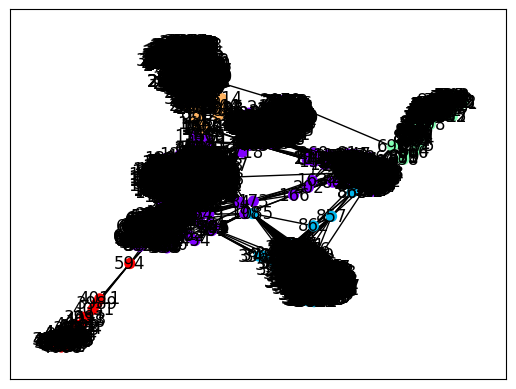

In [ ]:
import pandas as pd
import requests
from io import BytesIO
import gzip

# URL for the Facebook dataset
facebook_url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'

# Fetch and load the dataset
response = requests.get(facebook_url)
with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
    facebook_data = pd.read_csv(f, delimiter=' ', header=None, names=['source', 'target'])

import networkx as nx
facebook_graph = nx.from_pandas_edgelist(facebook_data, 'source', 'target')
adj_matrix_facebook = nx.to_numpy_array(facebook_graph)  # Updated function

# Spectral Clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

n_clusters = 5  # Choose the number of clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = spectral.fit_predict(adj_matrix_facebook)

# Evaluate clustering performance
silhouette_avg = silhouette_score(adj_matrix_facebook, labels, metric='precomputed')
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters
pos = nx.spring_layout(facebook_graph)
nx.draw_networkx(facebook_graph, pos, node_color=labels, with_labels=True, node_size=50, cmap=plt.cm.rainbow)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: -0.9967801287948482


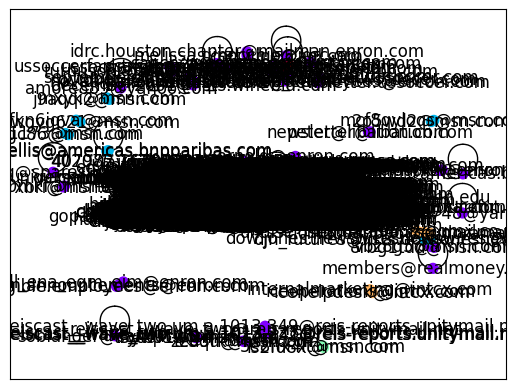

In [2]:
import pandas as pd
import requests
import tarfile
import os
from email.parser import BytesParser
from email.policy import default
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# URL for the Enron dataset
enron_url = 'https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz'

# Fetch and extract the dataset
response = requests.get(enron_url)
with open('enron_mail.tar.gz', 'wb') as f:
    f.write(response.content)

with tarfile.open('enron_mail.tar.gz', 'r:gz') as tar:
    tar.extractall('enron_mail')

# Parse emails and extract sender and receiver
emails = []
email_dir = 'enron_mail/maildir'

counter = 0
for root, dirs, files in os.walk(email_dir):
    for file in files:
        try:
            with open(os.path.join(root, file), 'rb') as f:
                email = BytesParser(policy=default).parse(f)
                if 'From' in email and 'To' in email:
                    senders = email['From']
                    receivers = email['To'].split(',')
                    for receiver in receivers:
                        emails.append((senders, receiver.strip()))
            counter += 1
            if counter > 1000:  # Limit to 1000 emails for testing
                break
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    if counter > 1000:
        break

# Convert to DataFrame
enron_data = pd.DataFrame(emails, columns=['sender', 'receiver'])
enron_data = enron_data.dropna()

# Create a graph
enron_graph = nx.from_pandas_edgelist(enron_data, 'sender', 'receiver')
adj_matrix_enron = nx.to_numpy_array(enron_graph)

# Ensure the diagonal is zero
np.fill_diagonal(adj_matrix_enron, 0)

# Apply Spectral Clustering
n_clusters = 5
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = spectral.fit_predict(adj_matrix_enron)

# Evaluate clustering performance
silhouette_avg = silhouette_score(adj_matrix_enron, labels, metric='precomputed')
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters
pos = nx.spring_layout(enron_graph)
nx.draw_networkx(enron_graph, pos, node_color=labels, with_labels=True, node_size=100, cmap=plt.cm.rainbow)
plt.show()


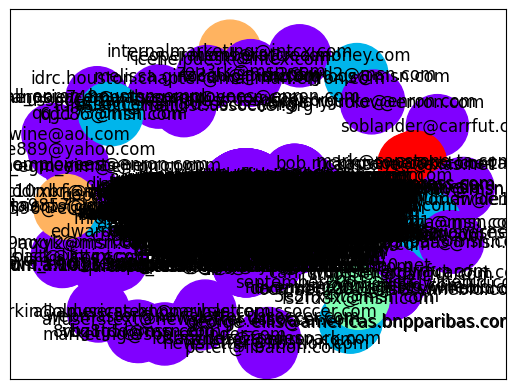

In [7]:
# Visualize the clusters
pos = nx.spring_layout(enron_graph)
nx.draw_networkx(enron_graph, pos, node_color=labels, with_labels=True, node_size=2000, cmap=plt.cm.rainbow)
plt.show()
